# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('data/apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df_apps.shape


(10841, 12)

In [5]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [6]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2915,"Mind Map AR, Augmented Reality ARCore Mind Map...",PRODUCTIVITY,4.20,29,35.00,"5,000",Free,0,Everyone,Productivity,"July 26, 2018",7.0 and up
6645,PakWheels: Buy & Sell Cars,AUTO_AND_VEHICLES,4.40,15168,37.00,"1,000,000",Free,0,Everyone,Auto & Vehicles,"July 27, 2018",4.2 and up
4740,Service CU Mobile Banking,FINANCE,4.70,6208,14.00,"100,000",Free,0,Everyone,Finance,"June 12, 2018",5.0 and up
2235,Free Cam Girls - Live Webcam,DATING,3.50,35,16.00,"1,000",Free,0,Mature 17+,Dating,"July 16, 2018",4.0.3 and up
568,Bar-B-Q Rib House,FOOD_AND_DRINK,5.00,2,33.00,50,Free,0,Everyone,Food & Drink,"March 8, 2018",2.3.3 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [7]:
df_apps=df_apps.drop(columns=['Last_Updated', 'Android_Ver'])
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
5000,Weather Live Pro,WEATHER,4.80,17493,11.00,"100,000",Paid,$4.49,Everyone,Weather
8424,Podcast Addict,NEWS_AND_MAGAZINES,4.60,413999,10.00,"5,000,000",Free,0,Teen,News & Magazines
4785,Advanced Warfare Guns,FAMILY,2.90,2079,5.60,"100,000",Free,0,Everyone,Entertainment
9995,Zombie Catchers,GAME,4.70,990663,75.00,"10,000,000",Free,0,Everyone,Action
8357,Mobi Calculator free & AD free!,TOOLS,4.60,77302,3.40,"5,000,000",Free,0,Everyone,Tools


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [60]:
df_apps.Rating.isna().values.sum()

1474

In [61]:
df_apps_clean=df_apps.dropna()
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [62]:
df_apps_clean.duplicated().sum()

476

In [63]:
df_apps_clean[df_apps_clean.App=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [64]:
df_apps_clean=df_apps_clean.drop_duplicates(subset=['App','Type','Price'])

In [65]:
df_apps_clean[df_apps_clean.App=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [66]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [67]:
df_apps_clean[df_apps_clean.Rating==df_apps_clean.Rating.max()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
2680,Florida Wildflowers,FAMILY,5.00,5,69.00,"1,000",Free,0,Everyone,Education
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.00,34,12.00,"5,000",Free,0,Everyone,Comics
3030,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.00,24,3.20,"5,000",Free,0,Everyone,Tools
3115,Oración CX,LIFESTYLE,5.00,103,3.80,"5,000",Free,0,Everyone,Lifestyle


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [68]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [69]:
df_apps_clean.sort_values('Reviews', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [70]:
ratings=df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

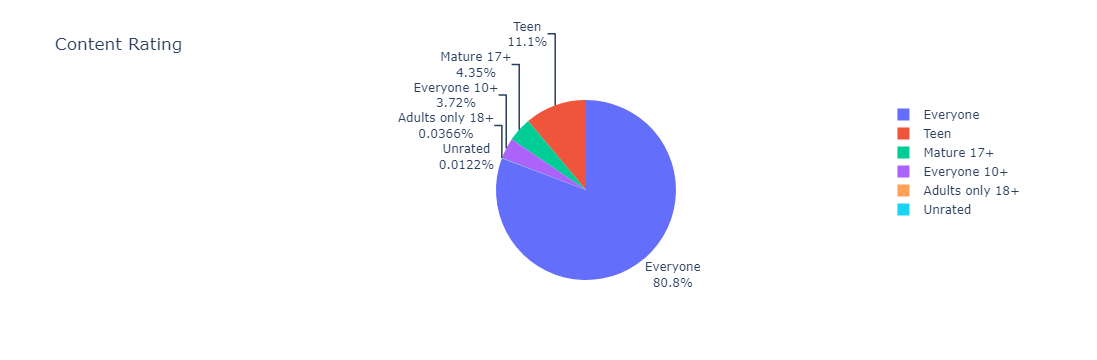

In [71]:
fig=px.pie(labels=ratings.index, values=ratings.values,
          title="Content Rating", names=ratings.index)
fig.update_traces(textposition='outside',textinfo='percent+label')
fig.show()

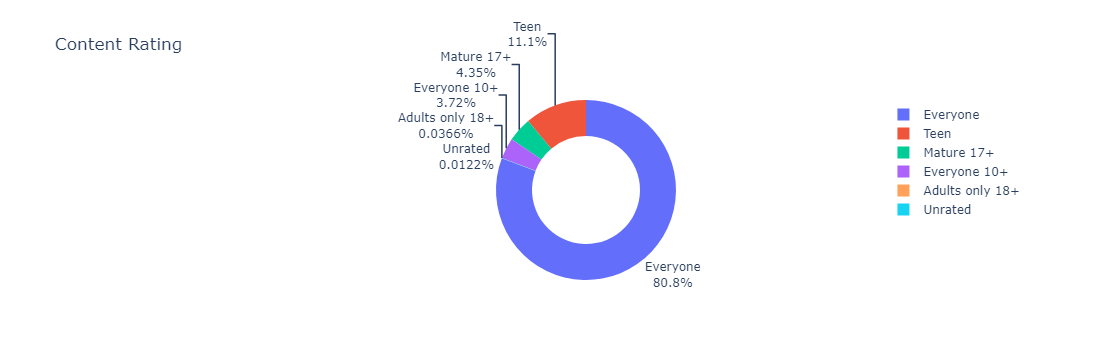

In [72]:
fig=px.pie(labels=ratings.index, values=ratings.values,
          title="Content Rating", names=ratings.index, 
          hole=0.6)
fig.update_traces(textposition='outside',textinfo='percent+label')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [92]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()



,App
Installs,
1,3
5,9
10,69
50,56
100,302
500,199
1000,694
5000,422
10000,983


In [97]:
cat_number=df_apps_clean.groupby('Category').agg({'App':pd.Series.count})
cat_merged_df=pd.merge(cat_number, category_installs, on='Category', how='inner')
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')

The dimensions of the DataFrame are: (33, 2)


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [98]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.sort_values('Price', ascending=False).head(20)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical,"79,990.00"
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical,"3,999.00"
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle,"37,990.00"
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical,"33,990.00"
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical,"29,990.00"
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical,"29,990.00"
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports,"1,499,500.00"
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education,299.90
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical,"2,499,000.00"
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical,"249,900.00"


### The most expensive apps sub $250

In [99]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical,"79,990.00"
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical,"3,999.00"
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle,"37,990.00"
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical,"33,990.00"
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical,"29,990.00"


### Highest Grossing Paid Apps (ballpark estimate)

In [100]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [101]:
df_apps_clean.Category.nunique()

33

In [102]:
top10_category=df_apps_clean.Category.value_counts()[:10]
top10_category

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

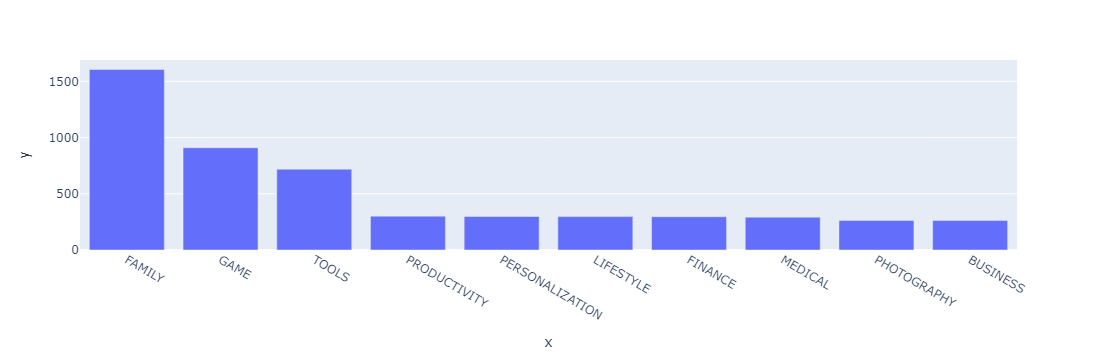

In [103]:
bar=px.bar(x=top10_category.index, y=top10_category.values)
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

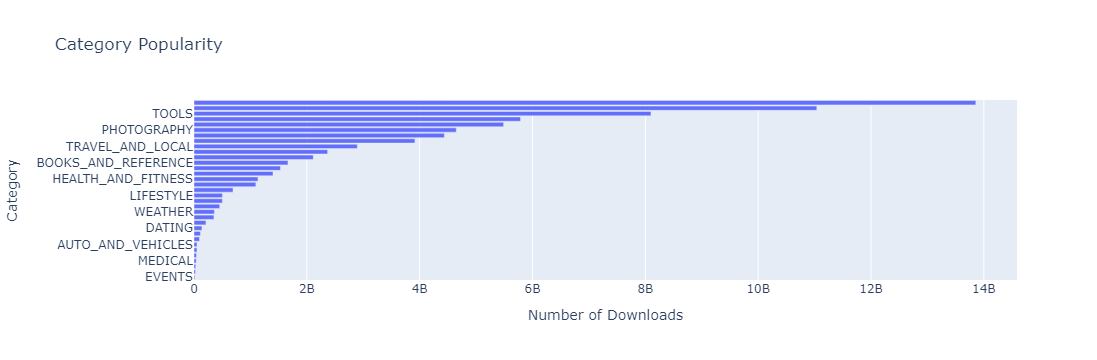

In [106]:
category_installs=df_apps_clean.groupby('Category').agg({'Installs':pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
h_bar=px.bar(x=category_installs.Installs,y=category_installs.index,orientation='h', 
            title='Category Popularity')
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

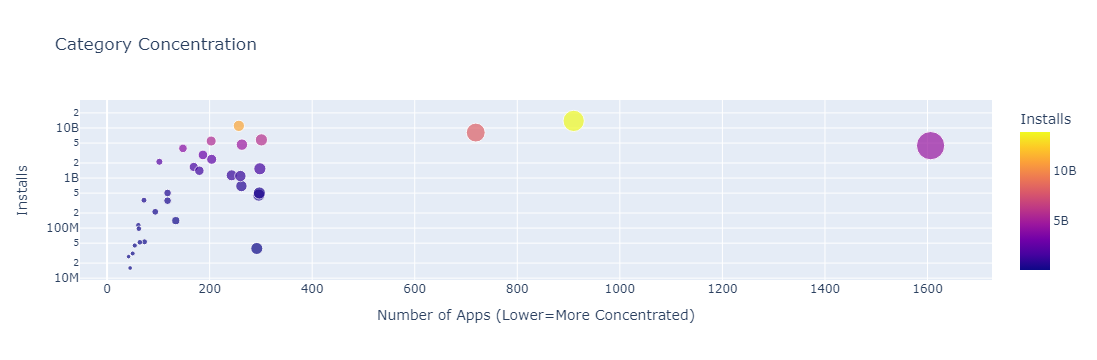

In [105]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [111]:
df_apps_clean.Genres.value_counts()
stack=df_apps_clean.Genres.str.split(';',expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres=stack.value_counts()
print(f'Number of genres: {len(num_genres)}')
num_genres

We now have a single column with shape: (8564,)
Number of genres: 53


Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

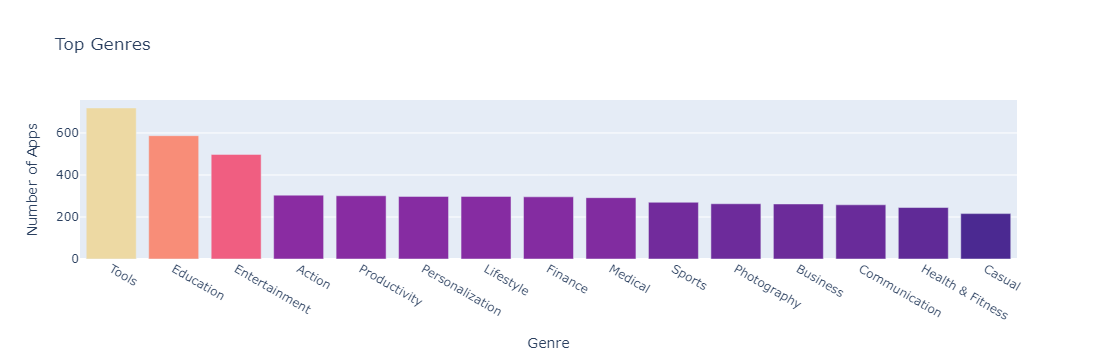

In [117]:
bar=px.bar(x=num_genres.index[:15], y=num_genres.values[:15],
          title='Top Genres', hover_name=num_genres.index[:15],
          color=num_genres.values[:15], color_continuous_scale='Agsunset')
bar.update_layout(yaxis_title='Number of Apps', xaxis_title='Genre', 
                  coloraxis_showscale=False)
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [118]:
df_apps_clean.Type.value_counts()

Type
Free    7595
Paid     589
Name: count, dtype: int64

In [121]:
df_free_vs_paid=df_apps_clean.groupby(['Category','Type'], as_index=False).agg({'App':pd.Series.count})
df_free_vs_paid

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

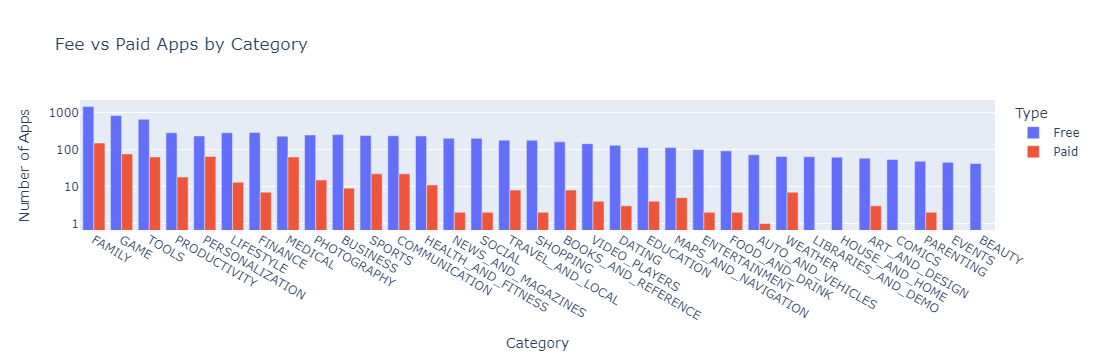

In [122]:
g_bar=px.bar(df_free_vs_paid,x='Category',y='App',title='Fee vs Paid Apps by Category',
             color='Type',barmode='group')
g_bar.update_layout(xaxis_title='Category', yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},yaxis=dict(type='log'))
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


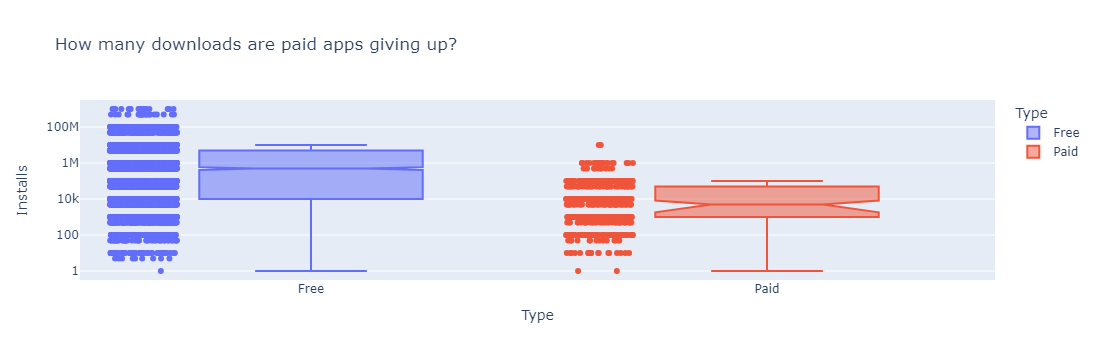

In [128]:
box=px.box(df_apps_clean,y='Installs', x='Type', color='Type', 
           notched=True, points='all', title='How many downloads are paid apps giving up?')
box.update_layout(yaxis=dict(type='log'))
box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

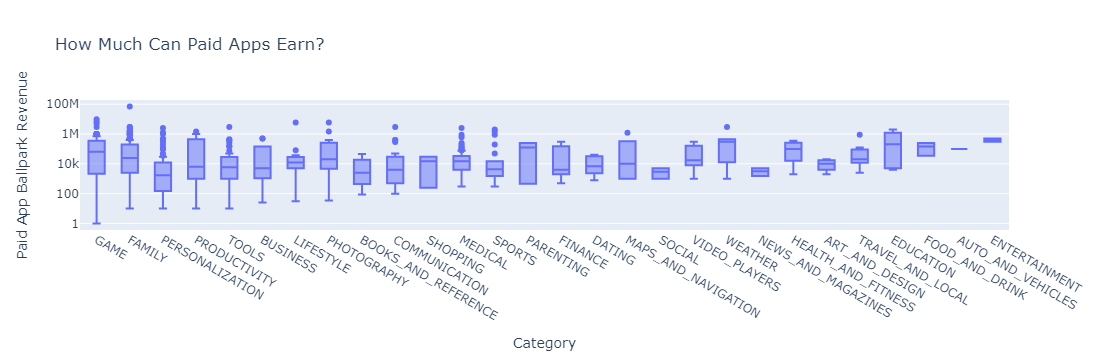

In [129]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [130]:
df_paid_apps.Price.median()

2.99

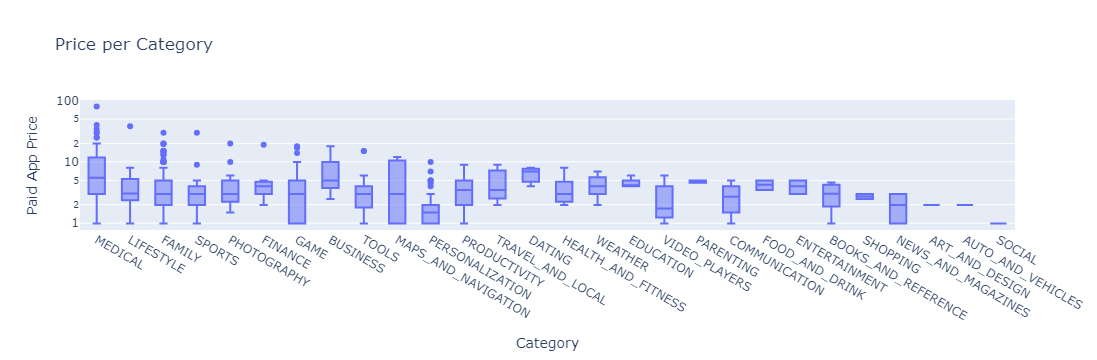

In [131]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()